In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ML_domain_of_applicability/LI-ion batteries/work/NCM-ML')

Mounted at /content/drive


In [3]:
data = pd.read_csv('NMC_numerical_new.csv')

In [4]:
X = data.drop(['IC', 'EC'], axis=1)
y_IC = data['IC']
y_EC = data['EC']

X_train, X_test, y_EC_train, y_EC_test = train_test_split(X, y_EC, test_size=0.2, random_state=42)
_, _, y_IC_train, y_IC_test = train_test_split(X, y_IC, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
def calculate_errors(y_train, y_train_pred, y_test, y_test_pred):
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    return rmse_train, rmse_test, r2_test

In [6]:
def plot_IC_curve(y_IC_train, y_train_pred, y_IC_test, y_test_pred, rmse_train, rmse_test, r2_test, model_name):
    results_train = pd.DataFrame({
        "Experimental": y_IC_train,
        "Predicted": y_train_pred
    })
    results_test = pd.DataFrame({
        "Experimental": y_IC_test,
        "Predicted": y_test_pred
    })

    plt.figure(figsize=(8, 8))
    plt.axis([50, 330, 50, 330])

    plt.scatter(x=results_train["Experimental"], y=results_train["Predicted"], c='deepskyblue', label='Training')
    plt.scatter(x=results_test["Experimental"], y=results_test["Predicted"], c='blue', label='Test')

    plt.plot([50, 360], [50, 360], label='True Line', color='red', linewidth=2)

    plt.legend(loc='lower right')
    plt.xlabel(r'Experimental Initial Charge Capacity (IC) (mAh/g)')
    plt.ylabel(r'Predicted Initial Charge Capacity (IC) (mAh/g)')
    plt.title(f'{model_name} - IC Results Plot')

    plt.text(60, 260, f"$RMSE_{{train}} = {rmse_train:.2f} \, mAh/g$\n" +
            f"$RMSE_{{test}} = {rmse_test:.2f} \, mAh/g$\n" +
            f"$R^2_{{test}} = {r2_test:.2f}$", fontsize=12)

    plt.savefig(f'{model_name}-IC-Predicted-vs-Test.png', dpi=1000)

    plt.show()

In [7]:
def plot_EC_curve(y_EC_train, y_train_pred, y_EC_test, y_test_pred, rmse_train, rmse_test, r2_test, model_name):
    results_train = pd.DataFrame({
        "Experimental": y_EC_train,
        "Predicted": y_train_pred
    })
    results_test = pd.DataFrame({
        "Experimental": y_EC_test,
        "Predicted": y_test_pred
    })

    plt.figure(figsize=(8, 8))
    plt.axis([50, 330, 50, 330])

    plt.scatter(x=results_train["Experimental"], y=results_train["Predicted"], c='deepskyblue', label='Training')
    plt.scatter(x=results_test["Experimental"], y=results_test["Predicted"], c='blue', label='Test')

    plt.plot([50, 360], [50, 360], label='True Line', color='red', linewidth=2)

    plt.legend(loc='lower right')
    plt.xlabel(r'Experimental 50th cycle discharge Capacity (EC) (mAh/g)')
    plt.ylabel(r'Predicted 50th cycle discharge Capacity (EC) (mAh/g)')
    plt.title(f'{model_name} - EC Results Plot')

    plt.text(60, 260, f"$RMSE_{{train}} = {rmse_train:.2f} \, mAh/g$\n" +
            f"$RMSE_{{test}} = {rmse_test:.2f} \, mAh/g$\n" +
            f"$R^2_{{test}} = {r2_test:.2f}$", fontsize=12)

    plt.savefig(f'{model_name}-EC-Predicted-vs-Test.png', dpi=1000)

    plt.show()

# Random Forest

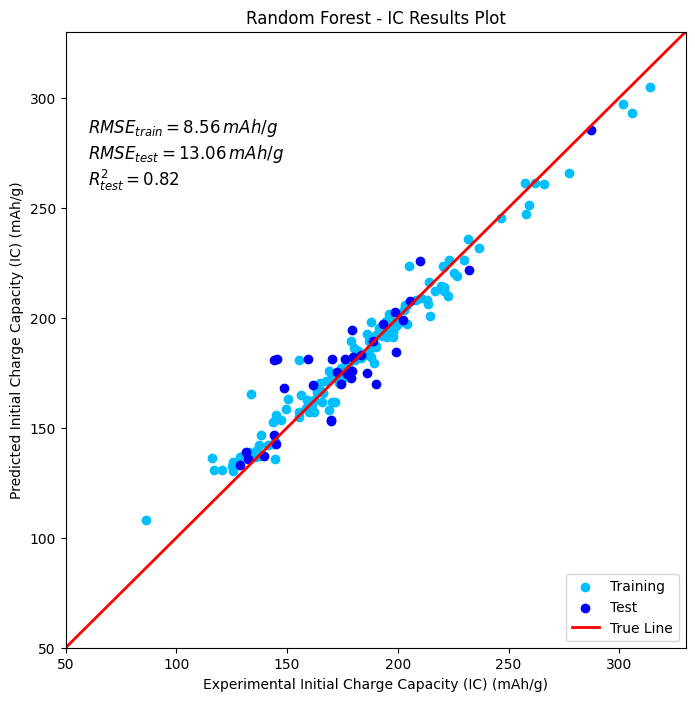

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_IC_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

rmse_train, rmse_test, r2_test = calculate_errors(y_IC_train, y_train_pred, y_IC_test, y_test_pred)
plot_IC_curve(y_IC_train, y_train_pred, y_IC_test, y_test_pred, rmse_train, rmse_test, r2_test, "Random Forest")

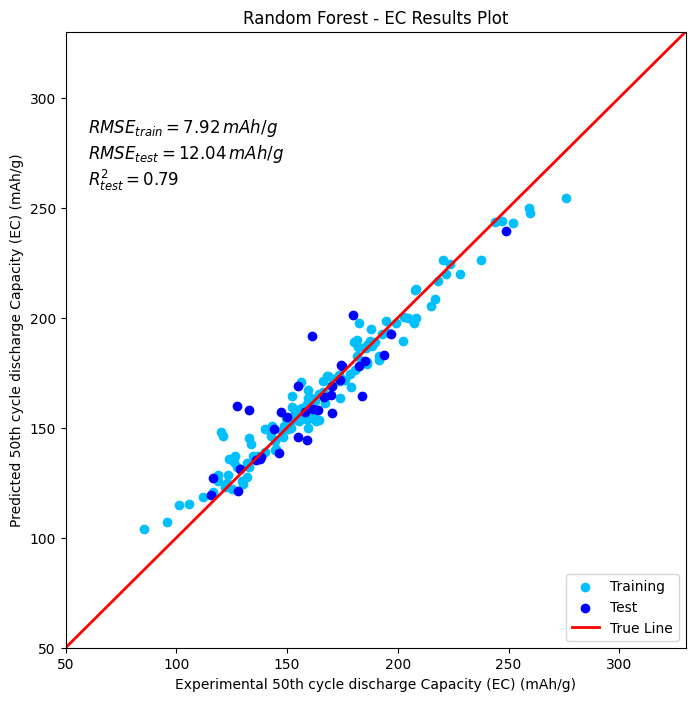

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_EC_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

rmse_train, rmse_test, r2_test = calculate_errors(y_EC_train, y_train_pred, y_EC_test, y_test_pred)
plot_EC_curve(y_EC_train, y_train_pred, y_EC_test, y_test_pred, rmse_train, rmse_test, r2_test, "Random Forest")

# XGboost

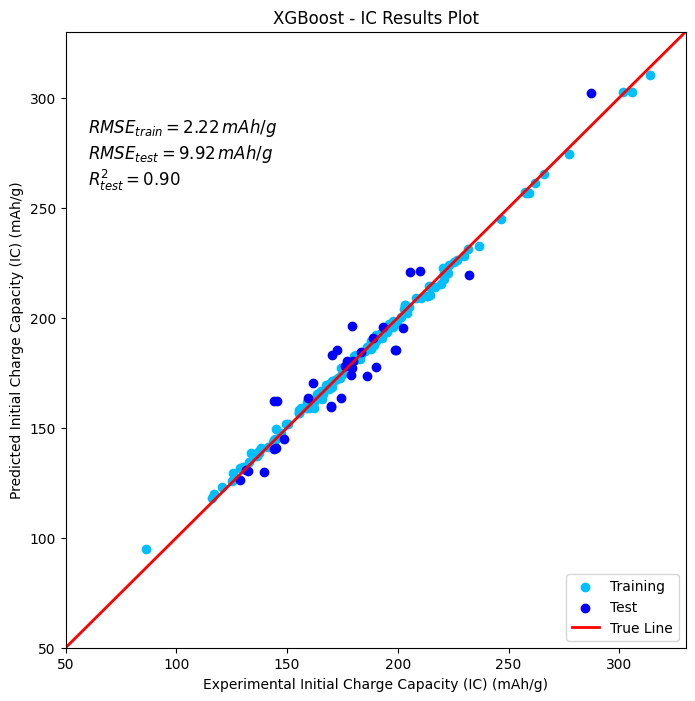

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_scaled, y_IC_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

rmse_train_xgb, rmse_test_xgb, r2_test_xgb = calculate_errors(y_IC_train, y_train_pred_xgb, y_IC_test, y_test_pred_xgb)
plot_IC_curve(y_IC_train, y_train_pred_xgb, y_IC_test, y_test_pred_xgb, rmse_train_xgb, rmse_test_xgb, r2_test_xgb, "XGBoost")


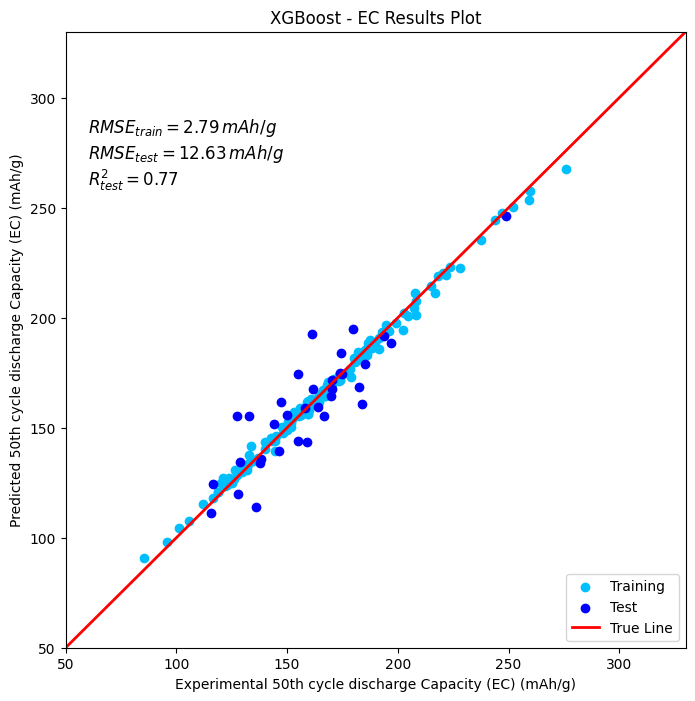

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_scaled, y_EC_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

rmse_train_xgb, rmse_test_xgb, r2_test_xgb = calculate_errors(y_EC_train, y_train_pred_xgb, y_EC_test, y_test_pred_xgb)
plot_EC_curve(y_EC_train, y_train_pred_xgb, y_EC_test, y_test_pred_xgb, rmse_train_xgb, rmse_test_xgb, r2_test_xgb, "XGBoost")


# LGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 20
[LightGBM] [Info] Start training from score 185.647687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

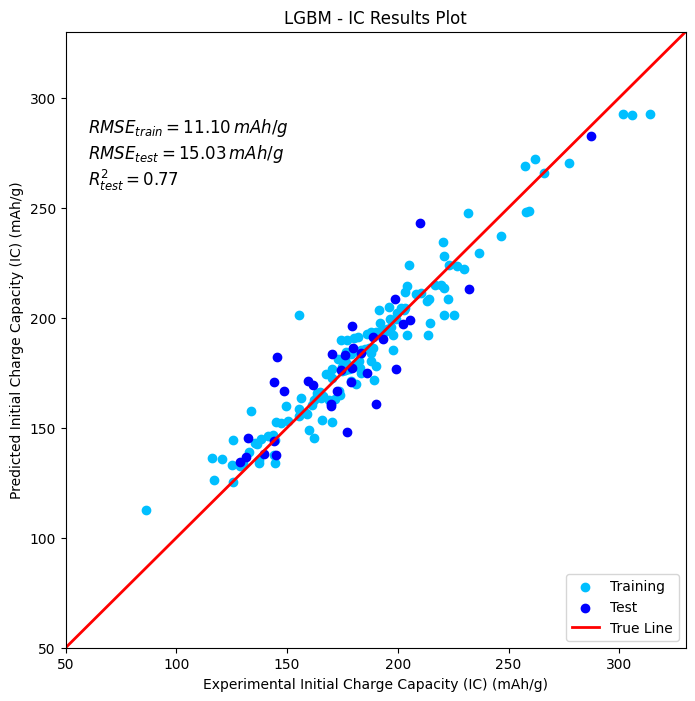

LGBM IC - Train RMSE: 11.10, Test RMSE: 15.03, R²: 0.77


In [11]:
lgbm_ic = LGBMRegressor(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
lgbm_ic.fit(X_train_scaled, y_IC_train)
y_pred_ic_train = lgbm_ic.predict(X_train_scaled)
y_pred_ic_test = lgbm_ic.predict(X_test_scaled)

rmse_train_ic, rmse_test_ic, r2_ic = calculate_errors(y_IC_train, y_pred_ic_train, y_IC_test, y_pred_ic_test)
plot_IC_curve(y_IC_train, y_pred_ic_train, y_IC_test, y_pred_ic_test, rmse_train_ic, rmse_test_ic, r2_ic, "LGBM")

print(f"LGBM IC - Train RMSE: {rmse_train_ic:.2f}, Test RMSE: {rmse_test_ic:.2f}, R²: {r2_ic:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 20
[LightGBM] [Info] Start training from score 166.005895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

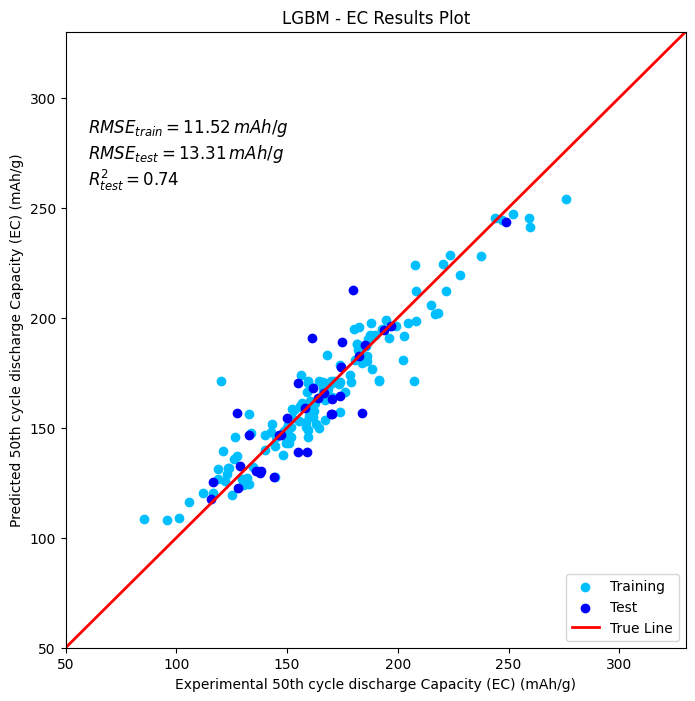

LGBM EC - Train RMSE: 11.52, Test RMSE: 13.31, R²: 0.74


In [12]:
lgbm_ec = LGBMRegressor(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
lgbm_ec.fit(X_train_scaled, y_EC_train)
y_pred_ec_train = lgbm_ec.predict(X_train_scaled)
y_pred_ec_test = lgbm_ec.predict(X_test_scaled)

rmse_train_ec, rmse_test_ec, r2_ec = calculate_errors(y_EC_train, y_pred_ec_train, y_EC_test, y_pred_ec_test)
plot_EC_curve(y_EC_train, y_pred_ec_train, y_EC_test, y_pred_ec_test, rmse_train_ec, rmse_test_ec, r2_ec, "LGBM")

print(f"LGBM EC - Train RMSE: {rmse_train_ec:.2f}, Test RMSE: {rmse_test_ec:.2f}, R²: {r2_ec:.2f}")
